In [2]:
import math
import periodictable
import pandas as pd
import numpy as np
from IPython.display import display

# ----------------------------- Constants -------------------------------------
rest_mass_energy_nucleon = 931.5            # MeV
fine_structure_constant    = 1 / 137.035999084
e                          = 1.602176634e-19 # Elementary charge (Coulombs)
m_e                        = 9.10938356e-31  # Electron mass (kg)
c                          = 2.998e8         # Speed of light (m/s)
r_e                        = 2.817e-15       # Classical electron radius (m)

# ----------------------------- User Parameters -------------------------------
projectile_atomic_number = 18   # Argon
target_atomic_number     = 13   # Aluminum
target_thickness         = 2    # µg/cm²

# ----------------------------- Crystal Parameters ----------------------------
Interplanner_distance = 6.71     # in Å (2d)
Order_of_reflection   = 1
Alpha_crystal_deg     = 0.2      # mosaicity of the crystal (degrees)
Alpha_crystal_steradians = Alpha_crystal_deg * math.pi / 180
crystal_length        = 75       # mm
crystal_height        = 30       # mm
theta_0               = 30 * math.pi / 180   # radians, angle of spectrometer
Conversion_constant   = 12398.52 # from eV to Å
crystal_thickness     = 0.002    # in m
N                     = 1.13e29  # atoms/m^3 (example value)
F                     = 1        # dimensionless crystal structure factor

# ----------------------------- Beam Parameters -------------------------------
deck_potential         = 0.015   # MeV
Stopping_power_SRIM    = 1       # (MeV/cm)
Energy_loss_through_target = 2   # (dE/E)
Energy_loss            = 0.000133333
Emittance_horizontal   = 120
Beam_height            = 1       # mm
Beam_width             = 7       # mm
Beam_straggling        = (4 * Emittance_horizontal) / (Beam_width*1000)
Target_straggling      = 0.024
delta_theta_f          = Beam_straggling
delta_E_over_E         = 0.0001333

# Apparent source length (for solid & gas)
Apparent_source_length_solid = abs(
    Beam_width * np.sin(theta_0 - (90 * math.pi/180)) / np.sin(90*math.pi/180)
)
Apparent_source_length_gas   = abs(
    (Beam_width / np.sin(theta_0))/ np.sin(90*math.pi/180)
)

# ------------------------- Spectrometer Dimensions ---------------------------
L = 804.265  # mm, mechanical distance between the crystal and detector

# ------------------------- TimePiX Detector ----------------------------------
Pixels            = 262144
Area_of_detector  = 792.98   # mm^2
Sensor_depth      = 300      # microns
r                 = 55e-3    # mm, pixel pitch
h_d               = 60       # mm, detection height (detector active size)
epsilon_glob      = 0.01     # (example global detection efficiency)

# ------------------------- Helper Functions ----------------------------------
def get_projectile_info(atomic_number):
    """Gets the name and atomic mass of a projectile element given its atomic number."""
    element = periodictable.elements[atomic_number]
    return element.name, element.mass

def get_target_info(atomic_number):
    """Gets the name and density of a target element given its atomic number."""
    element = periodictable.elements[atomic_number]
    return element.name, element.density

def calculate_projectile_energy(charge_state, deck_potential, atomic_mass):
    """Projectile energy (MeV/U)."""
    return (charge_state * deck_potential) / atomic_mass

def calculate_relativistic_velocity(projectile_energy):
    """Relativistic velocity (v/c)."""
    return math.sqrt(1 - 1 / (1 + projectile_energy / rest_mass_energy_nucleon) ** 2)

def calculate_velocity_in_terms_of_ua(relativistic_velocity):
    """Velocity of projectile in atomic units (v / alpha)."""
    return relativistic_velocity / fine_structure_constant

# ------------------------- Retrieve Projectile/Target Info -------------------
projectile_name, projectile_mass = get_projectile_info(projectile_atomic_number)
target_name, target_density     = get_target_info(target_atomic_number)

# ------------------------------- Main ----------------------------------------
def main():
    charge_state = int(input("Enter the charge state of the Ion: "))

    # Calculate energies/velocities
    projectile_energy     = calculate_projectile_energy(charge_state, deck_potential, projectile_mass)
    relativistic_velocity = calculate_relativistic_velocity(projectile_energy)
    velocity_in_ua        = calculate_velocity_in_terms_of_ua(relativistic_velocity)

    print(f"Projectile: {projectile_name} (Z={projectile_atomic_number}), Target: {target_name} (Z={target_atomic_number})")
    print(f"Projectile Energy (MeV/U): {projectile_energy:.6f}")
    print(f"Relativistic Velocity (v/c): {relativistic_velocity:.6f}")
    print(f"Velocity of projectile in terms of atomic units (ua): {velocity_in_ua:.6f}")

    return relativistic_velocity

if __name__ == "__main__":
    relativistic_velocity = main()

    # ------------------------- Define Data -----------------------------------
    data = {
        'Hydrogen like and Helium like': [
            'Bhalla cor Ar11+', 'Bhalla cor Ar11+', 'Bhalla cor Ar12+', 'Bhalla cor Ar12+',
            'Bhalla cor Ar13+', 'Kelly/Bhalla cor Ar13+', 'Bhalla cor Ar14+', 'Kelly/Bhalla cor Ar14+',
            'Cornille Ar16+', 'Ar15+', 'Ar15+', 'Ar15+', 'Ar15+', 'Ar15+', 'Ar15+', 'Ar15+', 
            'sat Ar16+', 'Ar16+', 'Ar16+', 'Ar15+', 'Ar15+', 'Ar15+', 'sat Ar16+', 'Ar15+', 
            'Ar16+', 'pose Ar16+-Ar11+'
        ],
        'Transitions': [
            '1s 2s 2p5 -> 1s2 2s 2p4', '1s 2s2 2p4 -> 1s2 2s2 2p3', '1s 2s 2p4 -> 1s2 2s 2p3',
            '1s 2s2 2p3 -> 1s2 2s2 2p2', '1s 2s 2p3 -> 1s2 2s 2p2', 
            '1s 2s2 2p2 -> 1s2 2s2 2p (Bha cor=-2.55eV Kelly 2P3/2)',
            '1s 2s 2p2 -> 1s2 2s 2p', 
            '1s 2s2 2p -> 1s2 2s2 (Bha cor=12.14eV Kelly 1P)', 
            '1s2s 3S1-> 1s2 (métastable)',
            '1s 2p2 (225 2D5/2)-> 1s2 2p (213 2P3/2)', '1s 2p2 (223 2D3/2)-> 1s2 2p (211 2P1/2)', 
            '1s 2p2 (213 2P3/2)-> 1s2 2p (213 2P3/2)',
            '1s 2p2 (211 2P1/2)-> 1s2 2p (211 2P1/2)', 
            '1s 2s 2p (211 2P1/2)-> 1s2 2s (201 2S1/2)', 
            '1s 2s 2p (213 2P3/2)-> 1s2 2s (201 2S1/2)',
            '1s 2p 3p -> 1s2 3p', '1s2p 3P1->1s2', '1s2p 3P2->1s2 (métastable)',
            '1s 2s 2p (211 2P1/2)-> 1s2 2s (201 2S1/2)', 
            '1s 2s 2p (213 2P3/2)-> 1s2 2s (201 2S1/2)', 
            '1s 2p2 (201 2S1/2)-> 1s2 2p (213 2P3/2)',
            '1s 2p 3s -> 1s2 3s', 
            '1s 2p2(201 2S1/2 -> 1s2 2p (211 2P1/2)', 
            '1s2p 1P1->1s2', 
            'pose Ar16+-Ar11+'
        ],
        'Rb(%)': [
            17, 14, 21, 17, 25, 18, 33, 16, 0, 26, 30, 87, 71, 87, 98, 25, 100, 0, 18, 6, 58, 27.7, 
            13, 100, 100
        ],
        'E0 (ev)': [
            3007.91, 3009.81, 3029.41, 3031.81, 3049.79, 3052.56, 3088.95, 3091.95, 
            3105.81, 3109.541, 3112.54, 3115.499, 3116, 3116.876, 3118.583, 3121, 
            3125.08, 3128.13, 3129.123, 3130, 3132.016, 3132.21, 3135.671, 3141.71, 
            3074.81
        ],
        'R_theta': [
            0.147945352, 0.148057156, 0.149232896, 0.149379619, 0.150497516, 0.150672629, 
            0.153042449, 0.153243453, 0.154182953, 0.154438889, 0.154645541, 0.154850234, 
            0.154884974, 0.154945762, 0.155064424, 0.155232898, 0.155518481, 0.155732951, 
            0.155802957, 0.155864854, 0.156007416, 0.156021154, 0.156266803, 0.156697987,
            0.152106493
        ]
    }

    # Ensure all lists have the same length
    max_length = max(len(lst) for lst in data.values())
    for key in data:
        if len(data[key]) < max_length:
            data[key].extend([None] * (max_length - len(data[key])))

    # ------------------------- Create DataFrame -------------------------------
    df = pd.DataFrame(data)

    # E_theta
    df['E_theta (ev)'] = (
        np.sqrt(1 - relativistic_velocity**2)
        / (1 - relativistic_velocity * np.cos(theta_0))
        * df['E0 (ev)']
    )

    # Delta_E_theta
    df['Delta_E_theta (ev)'] = df['E_theta (ev)'].diff()

    # Bragg theta
    Bragg_theta = (
        (Conversion_constant * Order_of_reflection)
        / (df['E_theta (ev)'] * Interplanner_distance)
    )
    df['Bragg_theta (stradian)'] = np.arcsin(Bragg_theta)
    df['Bragg_theta (Degree)']   = np.degrees(df['Bragg_theta (stradian)'])

    # Parameter 'a'
    df['a'] = (2 * L * Alpha_crystal_steradians**2) / np.tan(df['Bragg_theta (stradian)'])

    # Energy dispersion
    df['Energy_dispersion (eV/mm)'] = (
        df['E_theta (ev)'] / (2 * L * np.tan(df['Bragg_theta (stradian)']))
    )

    # Detector angle
    df['Detector_angle (stradian)'] = np.arctan(
        np.tan(df['Bragg_theta (stradian)'])
        * ((relativistic_velocity * np.sin(theta_0))
           / (1 - relativistic_velocity * np.cos(theta_0)))
    )
    df['Detector_angle (Degree)'] = np.degrees(df['Detector_angle (stradian)'])

    # Transmission
    df['transmission'] = (
        df['R_theta']
        * (h_d / (4 * math.pi * (L + L)))
        * epsilon_glob
    )

    # Resolution contributions (Gaussian-like)
    df['Res_energy_dispersion'] = (
        (((np.cos(theta_0) - relativistic_velocity) * delta_E_over_E)
         * (1 - np.sqrt(1 - relativistic_velocity**2))
         / (relativistic_velocity * (1 - relativistic_velocity * np.cos(theta_0))))
        * np.sqrt(1 - relativistic_velocity**2)
    )

    df['Res_angular_dispersion'] = (
        (relativistic_velocity * np.sin(theta_0) * delta_theta_f)
        / (1 - relativistic_velocity * np.cos(theta_0))
    )

    df['Res_apparent_source_height'] = (
        Beam_height / (2 * L * np.tan(df['Bragg_theta (stradian)']))
    )

    df['Res_apparent_source_length'] = (
        (Apparent_source_length_solid * (relativistic_velocity * np.sin(theta_0)))
        / (2 * L * (1 - relativistic_velocity * np.cos(theta_0)))
    )

    df['Res_detector'] = r / (2 * L * np.tan(df['Bragg_theta (stradian)']))

    df['Res_detector_1'] = 0.5 / (2 * L * np.tan(df['Bragg_theta (stradian)']))

    # Total Gaussian resolution
    df['T_Res_gaussian'] = np.sqrt(
        df['Res_energy_dispersion']**2
        + df['Res_angular_dispersion']**2
        + df['Res_apparent_source_height']**2
        + df['Res_apparent_source_length']**2
        + df['Res_detector']**2
        + df['Res_detector_1']**2
    )
    df['T_Res_gaussian (eV)'] = df['T_Res_gaussian'] * df['E_theta (ev)']

    # Crystal resolution
    df['Res_crystal'] = (
        (Alpha_crystal_steradians / np.tan(df['Bragg_theta (stradian)']))**2
    )

    # Lorentzian resolution
    df['Res_Lorentizienne'] = (
        0.205 * (df['Energy_dispersion (eV/mm)'] / df['E_theta (ev)'])
    )

    # Total resolution
    df['Total_resolution'] = (
        df['T_Res_gaussian'] + df['Res_crystal'] + df['Res_Lorentizienne']
    )
    df['resolution (eV)'] = df['Total_resolution'] * df['E_theta (ev)']

    # Energy range
    df['Energy_range'] = df['Energy_dispersion (eV/mm)'] * 60

    # Theta range
    df['Theta_range (stradian)'] = np.arctan(
        (np.sin(df['Bragg_theta (stradian)']) * (crystal_length / 2))
        / (L - np.cos(df['Bragg_theta (stradian)']) * (crystal_length / 2))
    ) + df['Bragg_theta (stradian)'] - (crystal_length / 2)

    df['Theta_range (degree)'] = np.degrees(df['Theta_range (stradian)'])

    # ------------------------- Display & Save ---------------------------------
    print(f"\nAverage Transmission: {df['transmission'].mean():.6f}\n")

    display(df[[
        'Transitions', 'E0 (ev)', 'E_theta (ev)', 'Delta_E_theta (ev)',
        'Bragg_theta (Degree)', 'Detector_angle (Degree)', 'a', 'R_theta',
        'Total_resolution', 'resolution (eV)', 'Energy_dispersion (eV/mm)',
        'Energy_range', 'Theta_range (degree)', 'transmission'
    ]])

    df[[
        'Transitions', 'E0 (ev)', 'E_theta (ev)', 'Delta_E_theta (ev)',
        'Bragg_theta (Degree)', 'Detector_angle (Degree)', 'a', 'R_theta',
        'Total_resolution', 'resolution (eV)', 'Energy_dispersion (eV/mm)',
        'Energy_range', 'Theta_range (degree)', 'transmission'
    ]].to_excel("output_data_spectrometer.xlsx", index=False)

    print("Data saved to output_data_spectrometer.xlsx")


Enter the charge state of the Ion:  17


Projectile: argon (Z=18), Target: aluminum (Z=13)
Projectile Energy (MeV/U): 0.006383
Relativistic Velocity (v/c): 0.003702
Velocity of projectile in terms of atomic units (ua): 0.507316

Average Transmission: 0.000005



,Transitions,E0 (ev),E_theta (ev),Delta_E_theta (ev),Bragg_theta (Degree),Detector_angle (Degree),a,R_theta,Total_resolution,resolution (eV),Energy_dispersion (eV/mm),Energy_range,Theta_range (degree),transmission
0,1s 2s 2p5 -> 1s2 2s 2p4,3007.910,3017.563943,NaN,37.758711,0.082408,0.025305,0.147945,0.001092,3.296255,2.422096,145.325760,-2109.135050,0.000004
1,1s 2s2 2p4 -> 1s2 2s2 2p3,3009.810,3019.470041,1.906098,37.730702,0.082324,0.025331,0.148057,0.001093,3.301678,2.426075,145.564489,-2109.164105,0.000004
2,1s 2s 2p4 -> 1s2 2s 2p3,3029.410,3039.132948,19.662907,37.444429,0.081478,0.025594,0.149233,0.001105,3.357795,2.467246,148.034759,-2109.461103,0.000004
3,1s 2s2 2p3 -> 1s2 2s2 2p2,3031.810,3041.540651,2.407703,37.409704,0.081375,0.025626,0.149380,0.001106,3.364689,2.472303,148.338195,-2109.497132,0.000004
4,1s 2s 2p3 -> 1s2 2s 2p2,3049.790,3059.578358,18.037707,37.151799,0.080619,0.025866,0.150498,0.001117,3.416501,2.510301,150.618074,-2109.764743,0.000004
5,1s 2s2 2p2 -> 1s2 2s2 2p (Bha cor=-2.55eV Kell...,3052.560,3062.357248,2.778890,37.112414,0.080504,0.025903,0.150673,0.001118,3.424508,2.516173,150.970356,-2109.805614,0.000004
6,1s 2s 2p2 -> 1s2 2s 2p,3088.950,3098.864043,36.506794,36.603401,0.079027,0.026387,0.153042,0.001139,3.530326,2.593739,155.624322,-2110.333906,0.000005
7,1s 2s2 2p -> 1s2 2s2 (Bha cor=12.14eV Kelly 1P),3091.950,3101.873671,3.009629,36.562121,0.078909,0.026427,0.153243,0.001141,3.539101,2.600169,156.010157,-2110.376756,0.000005
8,1s2s 3S1-> 1s2 (métastable),3105.810,3115.778155,13.904484,36.372724,0.078365,0.026611,0.154183,0.001149,3.579748,2.629950,157.797002,-2110.573369,0.000005
9,1s 2p2 (225 2D5/2)-> 1s2 2p (213 2P3/2),3109.541,3119.521130,3.742975,36.322107,0.078220,0.026660,0.154439,0.001151,3.590719,2.637987,158.279212,-2110.625918,0.000005


Data saved to output_data_spectrometer.xlsx


In [67]:
print(df.columns)

Index(['Hydrogen like and Helium like', 'Transitions', 'Rb(%)', 'E0 (ev)',
       'R_theta', 'E_theta (ev)', 'Delta_E_theta (ev)',
       'Bragg_theta (stradian)', 'Bragg_theta (Degree)', 'a',
       'Energy_dispersion (eV/mm)', 'Detector_angle (stradian)',
       'Detector_angle (Degree)', 'transmission', 'Res_energy_dispersion',
       'Res_angular_dispersion', 'Res_apparent_source_height',
       'Res_apparent_source_length', 'Res_detector', 'Res_detector_1',
       'T_Res_gaussian', 'T_Res_gaussian (eV)', 'Res_crystal',
       'Res_Lorentizienne', 'Total_resolution', 'resolution (eV)',
       'Energy_range', 'Theta_range (stradian)', 'Theta_range (degree)'],
      dtype='object')


In [3]:
# -------------------------------------------------------------------
# Distances (verify these values with Emily or Christophe if needed)
# -------------------------------------------------------------------
x              = 280350  # in micrometers
Crystal_tube   = 242     # in mm
Detector_tube  = 300     # in mm

# ------------------ Calculate the distances ------------------------
df['L_dash']   = L * (np.sin(2 * theta_0) / np.sin(2 * df['Bragg_theta (stradian)']))
df['b']        = L * (
    np.sin(2 * (theta_0 - df['Bragg_theta (stradian)'])) 
    / np.sin(2 * df['Bragg_theta (stradian)'])
)
df['L_dash-L'] = df['L_dash'] - L
df['Delta_x']  = x * np.sin(2 * (df['L_dash'] - df['Bragg_theta (stradian)']))

display(
    df[
        [   'Transitions', 'E0 (ev)', 'E_theta (ev)', 'Bragg_theta (Degree)', 'L_dash', 'b', 'L_dash-L', 'Delta_x']
    ]
)


,Transitions,E0 (ev),E_theta (ev),Bragg_theta (Degree),L_dash,b,L_dash-L,Delta_x
0,1s 2s 2p5 -> 1s2 2s 2p4,3007.910,3017.563943,37.758711,719.372911,-222.227685,-84.892089,-277237.252131
1,1s 2s2 2p4 -> 1s2 2s2 2p3,3009.810,3019.470041,37.730702,719.554963,-221.501100,-84.710037,-244091.719049
2,1s 2s 2p4 -> 1s2 2s 2p3,3029.410,3039.132948,37.444429,721.460622,-214.053298,-82.804378,103164.714006
3,1s 2s2 2p3 -> 1s2 2s2 2p2,3031.810,3041.540651,37.409704,721.697370,-213.147181,-82.567630,-27393.108434
4,1s 2s 2p3 -> 1s2 2s 2p2,3049.790,3059.578358,37.151799,723.493923,-206.398462,-80.771077,148533.671276
5,1s 2s2 2p2 -> 1s2 2s2 2p (Bha cor=-2.55eV Kell...,3052.560,3062.357248,37.112414,723.774234,-205.364875,-80.490766,252389.399517
6,1s 2s 2p2 -> 1s2 2s 2p,3088.950,3098.864043,36.603401,727.540765,-191.932780,-76.724235,191828.127703
7,1s 2s2 2p -> 1s2 2s2 (Bha cor=12.14eV Kelly 1P),3091.950,3101.873671,36.562121,727.858039,-190.837251,-76.406961,32887.520825
8,1s2s 3S1-> 1s2 (métastable),3105.810,3115.778155,36.372724,729.336711,-185.798508,-74.928289,-81566.816884
9,1s 2p2 (225 2D5/2)-> 1s2 2p (213 2P3/2),3109.541,3119.521130,36.322107,729.738320,-184.448387,-74.526680,136803.789785


Enter the Charge state of the Ion:  17


Projectile Energy (MeV/U): 0.006383
Relativistic Velocity (v/c): 0.003702
Velocity of projectile in terms of ua: 0.507316


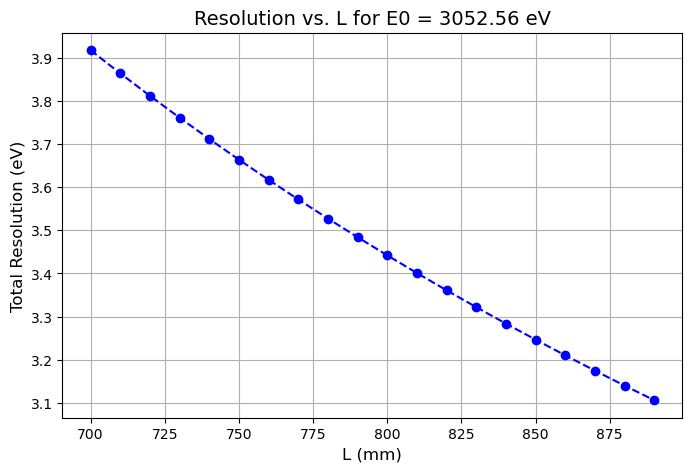

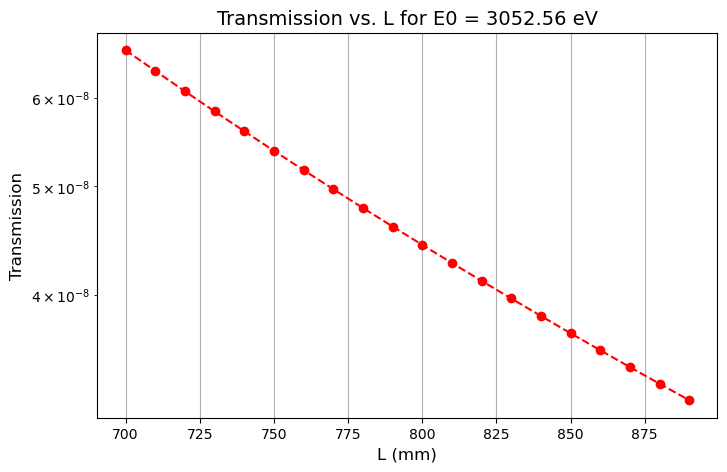

In [10]:
import math
import periodictable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
from tabulate import tabulate
from IPython.display import display

################################## Constants ##############################################################################
rest_mass_energy_nucleon = 931.5  # MeV
fine_structure_constant = 1 / 137.035999084  # approximately
e = 1.602176634e-19  # Elementary charge (Coulombs)
m_e = 9.10938356e-31  # Electron mass (kg)
c = 2.998e8  # Speed of light (m/s)
r_e = 2.817e-15   # Classical electron radius in m

################################  Input Values ############################################################################
projectile_atomic_number = 18  # Argon
target_atomic_number = 13      # Aluminum
target_thickness = 2           # µg/cm²

################################ Crystal ################################################################################## 
Interplanner_distance = 6.71   # Angstrom (2d)
Order_of_reflection = 1
Alpha_crystal_deg = 0.2        # degree (mosaic spread)
Alpha_crystal_steradians = Alpha_crystal_deg * math.pi / 180
crystal_length = 75            # mm
crystal_height = 30            # mm
theta_0 = 30 * math.pi / 180   # same as theta_L angle in radians
Conversion_constant = 12398.52 # eV·Å conversion factor
crystal_thickness = 0.002      # m
N = 1.13e29                    # atoms/m³ (for scattering)
F = 1                          # structure factor

################################# Beam parameters #########################################################################
deck_potential = 0.015         # in MeV
Stopping_power_SRIM = 1        # (MeV/cm)
Energy_loss_through_target = 2
Energy_loss = 0.000133333      # (dE/E)
Emittance_horizontal = 120
Beam_height = 1                # mm
Beam_width = 7                 # mm
Beam_straggling = (4*Emittance_horizontal)/(Beam_width*1000)
Target_straggling = 0.024

# Apparent source lengths
Apparent_source_length_solid = abs(Beam_width * np.sin(theta_0 - (90*math.pi/180)) / np.sin(90*math.pi/180))
Apparent_source_length_gas   = abs(Beam_width / np.sin(theta_0) / np.sin(90*math.pi/180))

# Beam straggling (angular dispersion)
delta_theta_f = (4 * Emittance_horizontal) / (Beam_width*1000)
delta_E_over_E = 0.0001333  # energy spread fraction

############################################ TimePix detector ##############################################################
Pixels = 262144
Area_of_detector = 792.98     # mm²
Sensor_depth = 300            # micron
r = 55e-3                     # mm, pitch of 55 micron
h_d = 60                      # mm, effective detection height
epsilon_glob = Area_of_detector / (4*np.pi* L) #0.01           # simplified detection efficiency

############################################################################################################################
def get_projectile_info(atomic_number):
    element = periodictable.elements[atomic_number]
    return element.name, element.mass

def get_target_info(atomic_number):
    element = periodictable.elements[atomic_number]
    return element.name, element.density

def calculate_projectile_energy(charge_state, deck_potential, atomic_mass):
    # Projectile energy (MeV/U)
    return (charge_state * deck_potential) / atomic_mass

def calculate_relativistic_velocity(projectile_energy):
    # Relativistic velocity (v/c)
    v_c = math.sqrt(1 - 1 / (1 + projectile_energy / rest_mass_energy_nucleon) ** 2)
    return v_c

def calculate_velocity_in_terms_of_ua(relativistic_velocity):
    return relativistic_velocity / fine_structure_constant

# Get projectile & target info
projectile_name, projectile_mass = get_projectile_info(projectile_atomic_number)
target_name, target_density     = get_target_info(target_atomic_number)

def main():
    charge_state = int(input("Enter the Charge state of the Ion: "))
    projectile_energy = calculate_projectile_energy(charge_state, deck_potential, projectile_mass)
    relativistic_velocity = calculate_relativistic_velocity(projectile_energy)
    velocity_in_ua = calculate_velocity_in_terms_of_ua(relativistic_velocity)

    print(f"Projectile Energy (MeV/U): {projectile_energy:.6f}")
    print(f"Relativistic Velocity (v/c): {relativistic_velocity:.6f}")
    print(f"Velocity of projectile in terms of ua: {velocity_in_ua:.6f}")
    return relativistic_velocity

if __name__ == "__main__":
    relativistic_velocity = main()

#################################### Data #################################################################################
data = {
    'Hydrogen like and Helium like': [
        'Bhalla cor Ar11+', 'Bhalla cor Ar11+', 'Bhalla cor Ar12+', 'Bhalla cor Ar12+',
        'Bhalla cor Ar13+', 'Kelly/Bhalla cor Ar13+', 'Bhalla cor Ar14+', 'Kelly/Bhalla cor Ar14+',
        'Cornille Ar16+', 'Ar15+', 'Ar15+', 'Ar15+', 'Ar15+', 'Ar15+', 'Ar15+', 'Ar15+', 'sat Ar16+',
        'Ar16+', 'Ar16+', 'Ar15+', 'Ar15+', 'Ar15+', 'sat Ar16+', 'Ar15+', 'Ar16+', 'pose Ar16+-Ar11+'
    ],
    'Transitions': [
        '1s 2s 2p5 -> 1s2 2s 2p4', '1s 2s2 2p4 -> 1s2 2s2 2p3', '1s 2s 2p4 -> 1s2 2s 2p3',
        '1s 2s2 2p3 -> 1s2 2s2 2p2', '1s 2s 2p3 -> 1s2 2s 2p2', '1s 2s2 2p2 -> 1s2 2s2 2p (Bha cor=-2.55eV Kelly 2P3/2)',
        '1s 2s 2p2 -> 1s2 2s 2p', '1s 2s2 2p -> 1s2 2s2 (Bha cor=12.14eV Kelly 1P)', '1s2s 3S1-> 1s2 (métastable)',
        '1s 2p2 (225 2D5/2)-> 1s2 2p (213 2P3/2)', '1s 2p2 (223 2D3/2)-> 1s2 2p (211 2P1/2)',
        '1s 2p2 (213 2P3/2)-> 1s2 2p (213 2P3/2)', '1s 2p2 (211 2P1/2)-> 1s2 2p (211 2P1/2)',
        '1s 2s 2p (211 2P1/2)-> 1s2 2s (201 2S1/2)', '1s 2s 2p (213 2P3/2)-> 1s2 2s (201 2S1/2)',
        '1s 2p 3p -> 1s2 3p', '1s2p 3P1->1s2', '1s2p 3P2->1s2 (métastable)',
        '1s 2s 2p (211 2P1/2)-> 1s2 2s (201 2S1/2)', '1s 2s 2p (213 2P3/2)-> 1s2 2s (201 2S1/2)',
        '1s 2p2 (201 2S1/2)-> 1s2 2p (213 2P3/2)', '1s 2p 3s -> 1s2 3s',
        '1s 2p2(201 2S1/2 -> 1s2 2p (211 2P1/2)', '1s2p 1P1->1s2', 'pose Ar16+-Ar11+'
    ],
    'Rb(%)': [
        17, 14, 21, 17, 25, 18, 33, 16, 0, 26, 30, 87, 71, 87, 98, 25, 100, 0, 18, 6, 58, 27.7, 13, 100, 100
    ],
    'E0 (ev)': [
        3007.91, 3009.81, 3029.41, 3031.81, 3049.79, 3052.56, 3088.95, 3091.95, 3105.81, 3109.541,
        3112.54, 3115.499, 3116, 3116.876, 3118.583, 3121, 3125.08, 3128.13, 3129.123, 3130,
        3132.016, 3132.21, 3135.671, 3141.71, 3074.81
    ],
    'R_theta': [
        0.147945352, 0.148057156, 0.149232896, 0.149379619, 0.150497516, 0.150672629,
        0.153042449, 0.153243453, 0.154182953, 0.154438889, 0.154645541, 0.154850234,
        0.154884974, 0.154945762, 0.155064424, 0.155232898, 0.155518481, 0.155732951,
        0.155802957, 0.155864854, 0.156007416, 0.156021154, 0.156266803, 0.156697987,
        0.152106493 
    ]
}

# Make sure all lists have same length
max_length = max(len(lst) for lst in data.values())
for k in data:
    if len(data[k]) < max_length:
        data[k].extend([None]*(max_length - len(data[k])))

df = pd.DataFrame(data)

############################## Single Line / Single R_theta Example for which calculations are required ###########
# change the number of line for which calculations are required
index_of_interest = 5
E0_single = df['E0 (ev)'][index_of_interest]
R_theta_single = df['R_theta'][index_of_interest]

###############################################################################
# SCAN OVER L
###############################################################################
L_values = np.arange(700, 900, 10)  # 300 mm to 2000 mm step 100
results_resolution = []
results_transmission = []

for L in L_values:
    # --- 1) Calculate E_theta (Equation from the first script) ---
    E_theta = (
        np.sqrt(1 - relativistic_velocity**2)
        / (1 - relativistic_velocity * np.cos(theta_0))
    ) * E0_single

    # --- 2) Bragg angle for that E_theta ---
    Bragg_theta = (Conversion_constant * Order_of_reflection)/(E_theta*Interplanner_distance)
    Bragg_theta_rad = np.arcsin(Bragg_theta)

    # --- 3) Energy dispersion [eV/mm] (as in first script) ---
    #     E_disp = E / (2*L*tan(Bragg_theta))
    Energy_dispersion = E_theta / (2.0 * L * np.tan(Bragg_theta_rad))

    # --- 4) All resolution components (Gaussian-like terms) ---
    # Energy dispersion from accelerating potential spread
    Res_energy_dispersion = (
        (((np.cos(theta_0) - relativistic_velocity) * delta_E_over_E)
         * (1 - np.sqrt(1 - relativistic_velocity**2))
         / (relativistic_velocity * (1 - relativistic_velocity*np.cos(theta_0))))
        * np.sqrt(1 - relativistic_velocity**2)
    )

    # Angular dispersion from beam divergence
    Res_angular_dispersion = (
        (relativistic_velocity * np.sin(theta_0) * delta_theta_f)
        / (1 - relativistic_velocity * np.cos(theta_0))
    )

    # Apparent source height
    Res_apparent_source_height = Beam_height / (2.0 * L * np.tan(Bragg_theta_rad))

    # Apparent source length
    Res_apparent_source_length = (
        Apparent_source_length_solid 
        * (relativistic_velocity * np.sin(theta_0))
        / (2.0 * L * (1 - relativistic_velocity * np.cos(theta_0)))
    )

    # Detector resolution (pitch) 
    Res_detector = r / (2.0 * L * np.tan(Bragg_theta_rad))
    # Additional half-pixel or other factor
    Res_detector_1 = 0.5 / (2.0 * L * np.tan(Bragg_theta_rad))

    # Sum in quadrature => T_Res_gaussian
    T_Res_gaussian = np.sqrt(
        Res_energy_dispersion**2
        + Res_angular_dispersion**2
        + Res_apparent_source_height**2
        + Res_apparent_source_length**2
        + Res_detector**2
        + Res_detector_1**2
    )

    # Convert to eV => T_Res_gaussian (eV)
    T_Res_gaussian_eV = T_Res_gaussian * E_theta

    # --- 5) Crystal mosaic (exponential-like term) ---
    # (Alpha_crystal / tan(Bragg_theta))^2
    Res_crystal = (Alpha_crystal_steradians / np.tan(Bragg_theta_rad))**2

    # --- 6) Lorentzian broadening term ---
    # 0.205 * (Energy_dispersion / E_theta)
    Res_Lorentizienne = 0.205 * (Energy_dispersion / E_theta)

    # --- 7) Sum total resolution (dimensionless) ---
    # T_Res_gaussian + Res_crystal + Res_Lorentizienne
    Total_resolution_dimless = T_Res_gaussian + Res_crystal + Res_Lorentizienne
    # Multiply by E_theta to get eV
    resolution_eV = Total_resolution_dimless * E_theta

    # --- 8) Transmission (use the reflectivity from that single line) ---
    # from the first script: df['transmission'] = R_theta * (h_d / (4*pi*(L+L))) * epsilon_glob
    # which is basically R_theta * (h_d/(4 pi (2L))) * ...
    # We'll keep the same formula:
    transmission = R_theta_single * (h_d/(4.0 * math.pi * (2.0*L))) * (Area_of_detector/(4.0 * math.pi * L**2))#epsilon_glob

    # Save the results
    results_resolution.append((L, resolution_eV))
    results_transmission.append((L, transmission))

# Convert to arrays for plotting
L_array, resolution_array = zip(*results_resolution)
L_array, transmission_array = zip(*results_transmission)

############################################
# PLOTS
############################################

# 1) Plot total resolution vs. L
plt.figure(figsize=(8, 5))
plt.plot(L_array, resolution_array, 'o--', color='b')
plt.xlabel('L (mm)', fontsize=12)
plt.ylabel('Total Resolution (eV)', fontsize=12)
plt.title(f'Resolution vs. L for E0 = {E0_single:.2f} eV', fontsize=14)
plt.grid(True)
plt.show()

# 2) Plot transmission vs. L
plt.figure(figsize=(8, 5))
plt.plot(L_array, transmission_array, 'o--', color='r')

plt.yscale('log')
plt.xlabel('L (mm)', fontsize=12)
plt.ylabel('Transmission', fontsize=12)
plt.title(f'Transmission vs. L for E0 = {E0_single:.2f} eV', fontsize=14)
plt.grid(True)
plt.show()


In [70]:
import math
import periodictable
import numpy as np
from numpy.polynomial import Polynomial

################################## Constants ##############################################################################
rest_mass_energy_nucleon = 931.5  # MeV
fine_structure_constant = 1 / 137.035999084  # approximately
e = 1.602176634e-19  # Elementary charge (Coulombs)
m_e = 9.10938356e-31  # Electron mass (kg)
c = 2.998e8  # Speed of light (m/s)
################################  Give the values Atomic number of projectile and target ##################################
projectile_atomic_number = 18  # Argon
target_atomic_number = 13      # Aluminum
target_thickness = 2 #µg/cm²
################################ Crystal ################################################################################## 
Interplanner_distance = 6.71 # Angstrom (2d)
Order_of_reflection = 1
Alpha_crystal_deg = 0.2 # degree (mosaicity of the crystal)
Alpha_crystal_steradians = Alpha_crystal_deg * math.pi / 180
crystal_length = 75  # mm
crystal_height = 30   # mm
theta_0 = 30 * math.pi / 180 # radians it is the same as theta_L angle at which crystal spectrometer is placed
Conversion_constant = 12398.52 # conversion factor from energy to wavelength in angstroms.
crystal_thickness =  0.2 # in cm
N = 1.13e28  # (atoms/m3) value for density of scattering cells
F = 1  # example crystal structure factor (dimensionless)
################################################# Beam parameters ################################################################
deck_potential = 0.015 # in MeV
Stopping_power_SRIM = 1 #(MeV/cm)
Energy_loss_through_target = 2 #(dE/E): 0.022352941
Energy_loss = 0.000133333 # #(dE/E)
Emittance_horizontal = 120
Beam_height = 1 #(in mm)
Beam_width = 12 #7 # ± 3.5 (in mm) FROM EXCEL SHEET
Beam_straggling = (4*Emittance_horizontal) / (Beam_width*1000)
Target_straggling = 0.024
Apparent_source_length_solid = abs(Beam_width * np.sin(theta_0 - (90 * np.pi/180)) / np.sin(90*np.pi/180))  #Apparent source length (Solid)
Apparent_source_length_gas = abs((Beam_width / np.sin(theta_0))/ np.sin(90*np.pi/180))   #Apparent source length (gas)
delta_theta_f = (4 * Emittance_horizontal) / (Beam_width*1000)  # Beam Straggling 
delta_E_over_E = 0.0001333
############################################# Spectrometer dimensions ############################################################### 
L = 114.65 # L1 = L2 # Mechenical distance between the crystal and detector in mm
############################################ TimePiX detector ####################################################################### 
h_d = 60 # detection height of the detector
epsilon_glob = 0.8 # Efficiency of the detector at a considered energy 

def get_projectile_info(atomic_number):
    """Gets the name and atomic mass of a projectile element given its atomic number."""
    element = periodictable.elements[atomic_number]
    return element.name, element.mass

def get_target_info(atomic_number):
    """Gets the name and density of a target element given its atomic number."""
    element = periodictable.elements[atomic_number]
    return element.name, element.density

def calculate_projectile_energy(charge_state, deck_potential, atomic_mass):
    # Projectile energy (MeV/U)
    projectile_energy = (charge_state * deck_potential) / atomic_mass
    return projectile_energy

def calculate_relativistic_velocity(projectile_energy):
    # Relativistic velocity (v/c)
    v_c = math.sqrt(1 - 1 / (1 + projectile_energy / rest_mass_energy_nucleon) ** 2)
    return v_c

def calculate_velocity_in_terms_of_ua(relativistic_velocity):
    # Velocity of projectile in terms of (ua)
    velocity_in_ua = relativistic_velocity / fine_structure_constant
    return velocity_in_ua

# Get name and atomic mass for the projectile element
projectile_name, projectile_mass = get_projectile_info(projectile_atomic_number)

# Get name and density for the target element
target_name, target_density = get_target_info(target_atomic_number)

def interpolate_photon_energy(E0_value):
    # NIST XCOM database Absorb. coefficient for Carbon (Graphite)
    photon_energy = np.array([
        1000, 1500, 2000, 3000, 4000, 5000, 6000, 8000, 10000, 15000, 20000, 
        30000, 40000, 50000, 60000, 80000, 100000, 150000, 200000, 300000
    ])
    photoel_absorb = np.array([
        2.210E+03, 6.994E+02, 3.017E+02, 8.965E+01, 3.724E+01, 1.866E+01, 
        1.054E+01, 4.241E+00, 2.076E+00, 5.585E-01, 2.177E-01, 5.706E-02, 
        2.193E-02, 1.042E-02, 5.671E-03, 2.169E-03, 1.031E-03, 2.706E-04, 
        1.063E-04, 2.980E-05
    ])
    
    # Perform a polynomial fit (degree can be adjusted)
    degree = 8
    poly_fit = Polynomial.fit(np.log10(photon_energy), np.log10(photoel_absorb), degree)

    log_photon_energy = np.log10(E0_value)
    interpolated_value = 10**poly_fit(log_photon_energy)
    
    return interpolated_value

def main():
    charge_state = int(input("Enter the Charge state of the Ion: "))
    E0_value = float(input("Enter the value of E0 (eV): "))

    # Calculations
    projectile_energy = calculate_projectile_energy(charge_state, deck_potential, projectile_mass)
    relativistic_velocity = calculate_relativistic_velocity(projectile_energy)
    velocity_in_ua = calculate_velocity_in_terms_of_ua(relativistic_velocity)

    # Calculate E_theta
    E_theta = np.sqrt(1 - relativistic_velocity**2) / (1 - relativistic_velocity * np.cos(theta_0)) * E0_value
    Bragg_theta = (Conversion_constant * Order_of_reflection) / (E_theta * Interplanner_distance)
    Bragg_theta_rad = np.arcsin(Bragg_theta)
    Bragg_theta_deg = np.degrees(Bragg_theta_rad)

    # Absorption coefficient interpolation
    interpolated_absorb = interpolate_photon_energy(E0_value)

    # Transmission Calculation
    condition = crystal_thickness > 1 / interpolated_absorb
    R_theta = (((e**2 / (m_e * c**2))**2) * (N**2 * (Conversion_constant / E0_value)**3 * np.abs(F)**2) /
               np.sin(2 * Bragg_theta_rad) * (1 + np.cos(2 * Bragg_theta_rad)**2) / 2) / (2 * interpolated_absorb)
    if condition:
        transmission = R_theta * (h_d / (4 * math.pi * (L + L))) * epsilon_glob
    else:
        transmission = R_theta * (1 - np.exp((-2 * interpolated_absorb * crystal_thickness) /
                                             (np.sin(Bragg_theta_rad)))) * (h_d / (4 * math.pi * (L + L))) * epsilon_glob

    # Resolution Calculation
    Res_energy_dispersion = ((((np.cos(theta_0)) - relativistic_velocity) * delta_E_over_E) *
                             (1 - np.sqrt(1 - relativistic_velocity**2)) /
                             (relativistic_velocity * (1 - relativistic_velocity * (np.cos(theta_0))))) * np.sqrt(1 - relativistic_velocity**2)
    Res_angular_dispersion = (relativistic_velocity * (np.sin(theta_0)) * delta_theta_f) / (1 - relativistic_velocity * (np.cos(theta_0)))
    Res_apparent_source_height = Beam_height / (2 * L * np.tan(Bragg_theta_rad))
    Res_apparent_source_length = (Apparent_source_length_solid * (relativistic_velocity * np.sin(theta_0))) / (2 * L * (1 - relativistic_velocity * (np.cos(theta_0))))
    Res_detector = 427.9029e-3 / (2 * L * np.tan(Bragg_theta_rad))  # Detector resolution calculation

    T_Res_gaussian = np.sqrt(Res_energy_dispersion**2 + Res_angular_dispersion**2 + Res_apparent_source_height**2 +
                             Res_apparent_source_length**2 + Res_detector**2)
    
    Res_crystal = (Alpha_crystal_steradians / np.tan(Bragg_theta_rad))**2
    Res_Lorentizienne = 0.205 * (E_theta / (2 * L * np.tan(Bragg_theta_rad)))  # Resolution Lorentzian
    Total_resolution = T_Res_gaussian + Res_crystal + Res_Lorentizienne
    resolution_eV = Total_resolution * E_theta

    # Print results
    print(f"Projectile Energy (MeV/U): {projectile_energy:.6f}")
    print(f"Relativistic Velocity (v/c): {relativistic_velocity:.6f}")
    print(f"Velocity of projectile in terms of ua: {velocity_in_ua:.6f}")
    print(f"E_theta (eV): {E_theta:.6f}")
    print(f"Bragg_theta (Degree): {Bragg_theta_deg:.6f}")
    print(f"Transmission: {transmission:.6f}")
    print(f"Resolution (eV): {resolution_eV:.6f}")

    return relativistic_velocity

if __name__ == "__main__":
    relativistic_velocity = main()


Enter the Charge state of the Ion:  17
Enter the value of E0 (eV):  3000


Projectile Energy (MeV/U): 0.006383
Relativistic Velocity (v/c): 0.003702
Velocity of projectile in terms of ua: 0.507316
E_theta (eV): 3009.628556
Bragg_theta (Degree): 37.875811
Transmission: 45026.652301
Resolution (eV): 10429.770625


Enter the Charge state of the Ion:  17


Projectile Energy (MeV/U): 0.006383
Relativistic Velocity (v/c): 0.003702
Velocity of projectile in terms of ua: 0.507316


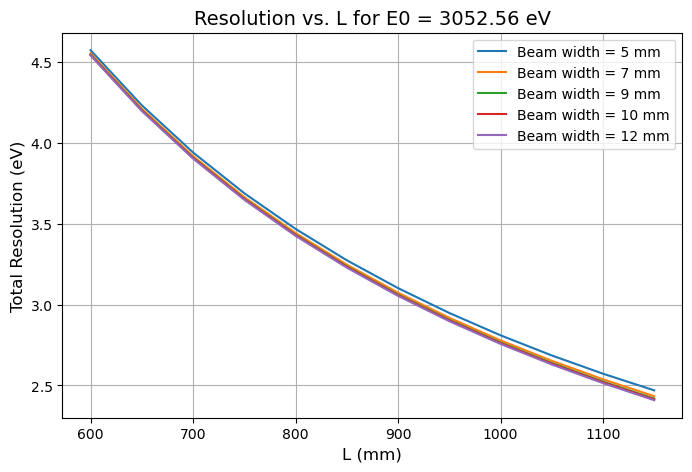

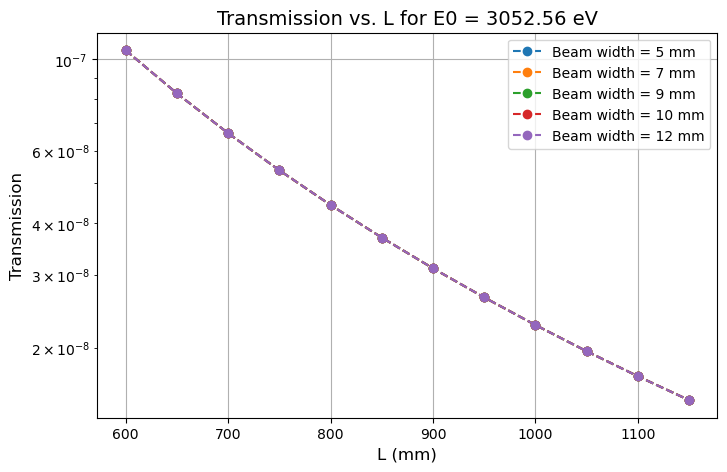

In [13]:
import math
import periodictable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

################################## Constants ##############################################################################
rest_mass_energy_nucleon = 931.5  # MeV
fine_structure_constant = 1 / 137.035999084  # approximately
e = 1.602176634e-19  # Elementary charge (Coulombs)
m_e = 9.10938356e-31  # Electron mass (kg)
c = 2.998e8  # Speed of light (m/s)
r_e = 2.817e-15   # Classical electron radius in m

################################  Input Values ############################################################################
projectile_atomic_number = 18  # Argon
target_atomic_number = 13      # Aluminum
target_thickness = 2           # µg/cm²

################################ Crystal ################################################################################## 
Interplanner_distance = 6.71   # Angstrom (2d)
Order_of_reflection = 1
Alpha_crystal_deg = 0.2        # degree (mosaic spread)
Alpha_crystal_steradians = Alpha_crystal_deg * math.pi / 180
crystal_length = 75            # mm
crystal_height = 30            # mm
theta_0 = 30 * math.pi / 180   # same as theta_L angle in radians
Conversion_constant = 12398.52 # eV·Å conversion factor
crystal_thickness = 0.002      # m
N = 1.13e29                    # atoms/m³ (for scattering)
F = 1                          # structure factor

################################# Beam parameters #########################################################################
deck_potential = 0.015         # in MeV
Stopping_power_SRIM = 1        # (MeV/cm)
Energy_loss_through_target = 2
Energy_loss = 0.000133333      # (dE/E)
Emittance_horizontal = 120
Beam_height = 1                # mm

# We'll override Beam_width in the loop.
# For reference, here are the different beam widths to scan:
beam_width_values = [5, 7, 9, 10, 12]  # mm

Beam_straggling = lambda bw: (4 * Emittance_horizontal) / (bw * 1000)
Target_straggling = 0.024

# Apparent source lengths
# (we will compute them inside the loop if we want them to depend on beam_width)
Apparent_source_length_solid = lambda bw: abs(bw * np.sin(theta_0 - (90*math.pi/180)) / np.sin(90*math.pi/180))
Apparent_source_length_gas   = lambda bw: abs(bw / np.sin(theta_0) / np.sin(90*math.pi/180))

delta_E_over_E = 0.0001333  # energy spread fraction

############################################ TimePix detector ##############################################################
Pixels = 262144
Area_of_detector = 792.98     # mm²
Sensor_depth = 300            # micron
r = 55e-3                     # mm, pitch of 55 micron
h_d = 60                      # mm, effective detection height

############################################################################################################################
def get_projectile_info(atomic_number):
    element = periodictable.elements[atomic_number]
    return element.name, element.mass

def get_target_info(atomic_number):
    element = periodictable.elements[atomic_number]
    return element.name, element.density

def calculate_projectile_energy(charge_state, deck_potential, atomic_mass):
    # Projectile energy (MeV/U)
    return (charge_state * deck_potential) / atomic_mass

def calculate_relativistic_velocity(projectile_energy):
    # Relativistic velocity (v/c)
    return math.sqrt(1 - 1 / (1 + projectile_energy / rest_mass_energy_nucleon) ** 2)

def calculate_velocity_in_terms_of_ua(relativistic_velocity):
    return relativistic_velocity / fine_structure_constant

# Get projectile & target info
projectile_name, projectile_mass = get_projectile_info(projectile_atomic_number)
target_name, target_density     = get_target_info(target_atomic_number)

###########################################
# MAIN
###########################################
def main():
    charge_state = int(input("Enter the Charge state of the Ion: "))
    projectile_energy = calculate_projectile_energy(charge_state, deck_potential, projectile_mass)
    relativistic_velocity = calculate_relativistic_velocity(projectile_energy)
    velocity_in_ua = calculate_velocity_in_terms_of_ua(relativistic_velocity)

    print(f"Projectile Energy (MeV/U): {projectile_energy:.6f}")
    print(f"Relativistic Velocity (v/c): {relativistic_velocity:.6f}")
    print(f"Velocity of projectile in terms of ua: {velocity_in_ua:.6f}")
    return relativistic_velocity

if __name__ == "__main__":
    relativistic_velocity = main()

#################################### Data #################################################################################
data = {
    'Hydrogen like and Helium like': [
        'Bhalla cor Ar11+', 'Bhalla cor Ar11+', 'Bhalla cor Ar12+', 'Bhalla cor Ar12+',
        'Bhalla cor Ar13+', 'Kelly/Bhalla cor Ar13+', 'Bhalla cor Ar14+', 'Kelly/Bhalla cor Ar14+',
        'Cornille Ar16+', 'Ar15+', 'Ar15+', 'Ar15+', 'Ar15+', 'Ar15+', 'Ar15+', 'Ar15+', 'sat Ar16+',
        'Ar16+', 'Ar16+', 'Ar15+', 'Ar15+', 'Ar15+', 'sat Ar16+', 'Ar15+', 'Ar16+', 'pose Ar16+-Ar11+'
    ],
    'Transitions': [
        '1s 2s 2p5 -> 1s2 2s 2p4', '1s 2s2 2p4 -> 1s2 2s2 2p3', '1s 2s 2p4 -> 1s2 2s 2p3',
        '1s 2s2 2p3 -> 1s2 2s2 2p2', '1s 2s 2p3 -> 1s2 2s 2p2', '1s 2s2 2p2 -> 1s2 2s2 2p (Bha cor=-2.55eV Kelly 2P3/2)',
        '1s 2s 2p2 -> 1s2 2s 2p', '1s 2s2 2p -> 1s2 2s2 (Bha cor=12.14eV Kelly 1P)', '1s2s 3S1-> 1s2 (métastable)',
        '1s 2p2 (225 2D5/2)-> 1s2 2p (213 2P3/2)', '1s 2p2 (223 2D3/2)-> 1s2 2p (211 2P1/2)',
        '1s 2p2 (213 2P3/2)-> 1s2 2p (213 2P3/2)', '1s 2p2 (211 2P1/2)-> 1s2 2p (211 2P1/2)',
        '1s 2s 2p (211 2P1/2)-> 1s2 2s (201 2S1/2)', '1s 2s 2p (213 2P3/2)-> 1s2 2s (201 2S1/2)',
        '1s 2p 3p -> 1s2 3p', '1s2p 3P1->1s2', '1s2p 3P2->1s2 (métastable)',
        '1s 2s 2p (211 2P1/2)-> 1s2 2s (201 2S1/2)', '1s 2s 2p (213 2P3/2)-> 1s2 2s (201 2S1/2)',
        '1s 2p2 (201 2S1/2)-> 1s2 2p (213 2P3/2)', '1s 2p 3s -> 1s2 3s',
        '1s 2p2(201 2S1/2 -> 1s2 2p (211 2P1/2)', '1s2p 1P1->1s2', 'pose Ar16+-Ar11+'
    ],
    'Rb(%)': [
        17, 14, 21, 17, 25, 18, 33, 16, 0, 26, 30, 87, 71, 87, 98, 25, 100, 0, 18, 6, 58, 27.7, 13, 100, 100
    ],
    'E0 (ev)': [
        3007.91, 3009.81, 3029.41, 3031.81, 3049.79, 3052.56, 3088.95, 3091.95, 3105.81, 3109.541,
        3112.54, 3115.499, 3116, 3116.876, 3118.583, 3121, 3125.08, 3128.13, 3129.123, 3130,
        3132.016, 3132.21, 3135.671, 3141.71, 3074.81
    ],
    'R_theta': [
        0.147945352, 0.148057156, 0.149232896, 0.149379619, 0.150497516, 0.150672629,
        0.153042449, 0.153243453, 0.154182953, 0.154438889, 0.154645541, 0.154850234,
        0.154884974, 0.154945762, 0.155064424, 0.155232898, 0.155518481, 0.155732951,
        0.155802957, 0.155864854, 0.156007416, 0.156021154, 0.156266803, 0.156697987,
        0.152106493 
    ]
}

# Make sure all lists have same length
max_length = max(len(lst) for lst in data.values())
for k in data:
    if len(data[k]) < max_length:
        data[k].extend([None]*(max_length - len(data[k])))

df = pd.DataFrame(data)

##############################
# Single line to analyze
##############################
index_of_interest = 5
E0_single = df['E0 (ev)'][index_of_interest]
R_theta_single = df['R_theta'][index_of_interest]

# Range of L
L_values = np.arange(600, 1200, 50)  # example: 700 mm to 900 mm step 10

###########################################################################
# PREPARE PLOTS (two separate figures)
###########################################################################
plt.figure(figsize=(8, 5))
for bw in beam_width_values:
    # We recalculate anything that depends on beam_width here.
    # 1) The beam straggling delta_theta_f for the current beam_width:
    delta_theta_f = (4.0 * Emittance_horizontal) / (bw * 1000.0)
    
    # 2) Apparent source length (solid target)
    app_source_length_solid = abs(bw * np.sin(theta_0 - (90*math.pi/180)) / np.sin(90*math.pi/180))
    
    # Loop over L, compute resolution for each
    resolutions = []
    for L in L_values:
        # E_theta
        E_theta = (
            np.sqrt(1 - relativistic_velocity**2)
            / (1 - relativistic_velocity * np.cos(theta_0))
        ) * E0_single

        # Bragg angle
        Bragg_theta = (Conversion_constant * Order_of_reflection)/(E_theta*Interplanner_distance)
        Bragg_theta_rad = np.arcsin(Bragg_theta)

        # Energy dispersion [1/mm]
        Energy_dispersion = E_theta / (2.0 * L * np.tan(Bragg_theta_rad))

        # --- 4) All resolution components (Gaussian-like terms) ---
        # Energy dispersion from accelerating potential spread
        Res_energy_dispersion = (
            (((np.cos(theta_0) - relativistic_velocity) * delta_E_over_E)
             * (1 - np.sqrt(1 - relativistic_velocity**2))
             / (relativistic_velocity * (1 - relativistic_velocity*np.cos(theta_0))))
            * np.sqrt(1 - relativistic_velocity**2)
        )

        # Angular dispersion from beam divergence
        Res_angular_dispersion = (
            (relativistic_velocity * np.sin(theta_0) * delta_theta_f)
            / (1 - relativistic_velocity * np.cos(theta_0))
        )

        # Apparent source height
        Res_apparent_source_height = Beam_height / (2.0 * L * np.tan(Bragg_theta_rad))

        # Apparent source length
        Res_apparent_source_length = (
            app_source_length_solid
            * (relativistic_velocity * np.sin(theta_0))
            / (2.0 * L * (1 - relativistic_velocity * np.cos(theta_0)))
        )

        # Detector resolution
        Res_detector = r / (2.0 * L * np.tan(Bragg_theta_rad))
        # Additional half-pixel factor
        Res_detector_1 = 0.5 / (2.0 * L * np.tan(Bragg_theta_rad))

        # Combine in quadrature
        T_Res_gaussian = np.sqrt(
            Res_energy_dispersion**2
            + Res_angular_dispersion**2
            + Res_apparent_source_height**2
            + Res_apparent_source_length**2
            + Res_detector**2
            + Res_detector_1**2
        )

        # Convert to eV
        T_Res_gaussian_eV = T_Res_gaussian * E_theta

        # 5) Crystal mosaic
        Res_crystal = (Alpha_crystal_steradians / np.tan(Bragg_theta_rad))**2

        # 6) Lorentzian broadening
        Res_Lorentizienne = 0.205 * (Energy_dispersion / E_theta)

        # 7) Sum total resolution
        Total_resolution_dimless = T_Res_gaussian + Res_crystal + Res_Lorentizienne
        resolution_eV = Total_resolution_dimless * E_theta

        resolutions.append(resolution_eV)

    # Plot resolution vs L for this beam_width
    #plt.plot(L_values, resolutions, 'o--', label=f"Beam width = {bw} mm")
    plt.plot(L_values, resolutions, '-', label=f"Beam width = {bw} mm")

plt.xlabel('L (mm)', fontsize=12)
plt.ylabel('Total Resolution (eV)', fontsize=12)
plt.title(f'Resolution vs. L for E0 = {E0_single:.2f} eV', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

###########################################################################
# Transmission vs L for each beam_width
###########################################################################
plt.figure(figsize=(8, 5))
for bw in beam_width_values:
    # Again, recalc any quantity that depends on beam_width, if necessary.
    transmissions = []
    for L in L_values:
        # Simplified example of E_theta from above:
        E_theta = (
            np.sqrt(1 - relativistic_velocity**2)
            / (1 - relativistic_velocity * np.cos(theta_0))
        ) * E0_single

        # Use the same (example) formula for the single line's "transmission."
        # This part is your reflection + geometric factor, etc.
        transmission = (
            R_theta_single
            * (h_d/(4.0 * math.pi * (2.0*L)))
            * (Area_of_detector/(4.0 * math.pi * L**2))
        )
        transmissions.append(transmission)

    # Plot transmission vs L
    plt.plot(L_values, transmissions, 'o--', label=f"Beam width = {bw} mm")

plt.yscale('log')
plt.xlabel('L (mm)', fontsize=12)
plt.ylabel('Transmission', fontsize=12)
plt.title(f'Transmission vs. L for E0 = {E0_single:.2f} eV', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()
